In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import requests
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import ipympl
from matplotlib import pyplot as plt

In [2]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
soup = bs(html, 'html.parser')
results = soup.find_all("tr", class_="data-row")
print(results)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [5]:
print(len(results))

1867


In [6]:
id_list = []
date_list = []
sol_list = []
ls_list = []
month_list = []
min_temp_list = []
pressure_list = []
for x in range(1867):
    cells = results[x].find_all("td")
    row_list = []
    for cell in cells:
        data = cell.text
        row_list.append(data)
    id_list.append(row_list[0])
    date_list.append(row_list[1])
    sol_list.append(row_list[2])
    ls_list.append(row_list[3])
    month_list.append(row_list[4])
    min_temp_list.append(row_list[5])
    pressure_list.append(row_list[6])

In [7]:
mars_weather_df = pd.DataFrame({'id':id_list,'terrestrial date':date_list,'sol':sol_list,'ls':ls_list,
                                'month':month_list,'min temp':min_temp_list,'pressure':pressure_list})
mars_weather_df.head()

,id,terrestrial date,sol,ls,month,min temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
print(type(mars_weather_df['id'][0]))
print(type(mars_weather_df['terrestrial date'][0]))
print(type(mars_weather_df['sol'][0]))
print(type(mars_weather_df['ls'][0]))
print(type(mars_weather_df['month'][0]))
print(type(mars_weather_df['min temp'][0]))
print(type(mars_weather_df['pressure'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
mars_weather_df['id'] = mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial date'] = pd.to_datetime(mars_weather_df['terrestrial date'], format="%Y-%m-%d")
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)
mars_weather_df['month'] = mars_weather_df['month'].astype(int)
mars_weather_df['min temp'] = mars_weather_df['min temp'].astype(float)
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

In [10]:
print(type(mars_weather_df['id'][0]))
print(type(mars_weather_df['terrestrial date'][0]))
print(type(mars_weather_df['sol'][0]))
print(type(mars_weather_df['ls'][0]))
print(type(mars_weather_df['month'][0]))
print(type(mars_weather_df['min temp'][0]))
print(type(mars_weather_df['pressure'][0]))

<class 'numpy.int32'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [11]:
num_months = mars_weather_df['month'].max()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [12]:
martian_days = len(mars_weather_df['sol'].unique())
print(f"There are {martian_days} Martian days worth of data in the table.")

There are 1867 Martian days worth of data in the table.


The coldest Mars month is 3 with an avg min temp of -83.30729166666667
The warmest Mars month is 8 with an avg min temp of -68.38297872340425


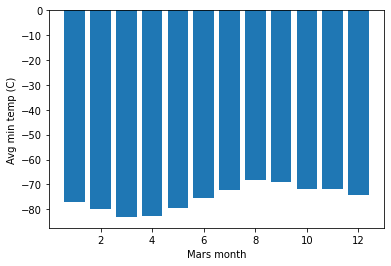

In [14]:
mars_weather_avg_by_month = mars_weather_df.groupby("month").mean()
coldest_temp = mars_weather_avg_by_month['min temp'].min()
coldest_month = mars_weather_avg_by_month['min temp'].idxmin()
print(f'The coldest Mars month is {coldest_month} with an avg min temp of {coldest_temp}')
warmest_temp = mars_weather_avg_by_month['min temp'].max()
warmest_month = mars_weather_avg_by_month['min temp'].idxmax()
print(f'The warmest Mars month is {warmest_month} with an avg min temp of {warmest_temp}')

x = mars_weather_avg_by_month.index
height = mars_weather_avg_by_month['min temp']
plt.bar(x=x, height=height)
plt.xlabel('Mars month')
plt.ylabel('Avg min temp (C)')
plt.show()

The Mars month with the lowest avg pressure is 6 with an avg pressure of 745.0544217687075
The Mars month with the highest avg pressure is 9 with an avg pressure of 913.3059701492538


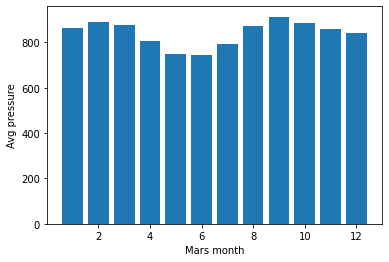

In [15]:
lowest_pres = mars_weather_avg_by_month['pressure'].min()
lowest_pres_month = mars_weather_avg_by_month['pressure'].idxmin()
print(f'The Mars month with the lowest avg pressure is {lowest_pres_month} with an avg pressure of {lowest_pres}')
highest_pres = mars_weather_avg_by_month['pressure'].max()
highest_pres_month = mars_weather_avg_by_month['pressure'].idxmax()
print(f'The Mars month with the highest avg pressure is {highest_pres_month} with an avg pressure of {highest_pres}')

x = mars_weather_avg_by_month.index
height = mars_weather_avg_by_month['pressure']
plt.bar(x=x, height=height)
plt.xlabel('Mars month')
plt.ylabel('Avg pressure')
plt.show()

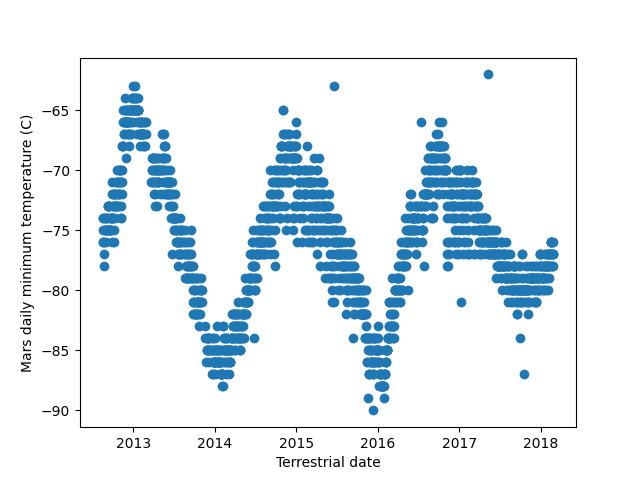

In [17]:
%matplotlib widget
x = mars_weather_df['terrestrial date']
y= mars_weather_df['min temp']
plt.scatter(x=x,y=y)
plt.xlabel('Terrestrial date')
plt.ylabel('Mars daily minimum temperature (C)')
plt.show()

In [ ]:
# From the visualization, we can see that the temperature on Mars has a cycle of slightly less than two earth years.
# We can estimate this to be 1.9 earth years, or 694 earth days. This turns out to be a very good estimate compared
# to the exact value of 687 earth days (https://mars.nasa.gov/resources/21392/mars-in-a-minute-how-long-is-a-year-on-mars/).

In [18]:
mars_weather_df.to_csv('mars_weather.csv', index=False)